# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import calendar
import warnings
warnings.filterwarnings('ignore')
from datetime import date
from datetime import datetime

# Reading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Try reading the file with a different encoding like 'latin-1' or 'ISO-8859-1'
try:
    df = pd.read_csv("/content/drive/MyDrive/Sprints/data.csv", encoding='latin-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv("/content/drive/MyDrive/Sprints/data.csv", encoding='ISO-8859-1')
    except UnicodeDecodeError:
        print("Could not decode with latin-1 or ISO-8859-1. Please try other encodings.")
        raise  # Re-raise the error to provide the original traceback

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Task 1: Data Cleaning

## Description:
- Clean and preprocess the dataset by handling missing values, formatting data types, and removing incorrect records.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Handle missing values in CustomerID
df['CustomerID'].fillna(-1,inplace=True)

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# Convert InvoiceDate to DateTime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Remove rows with negative Quantity or UnitPrice
df = df.drop(df[(df["Quantity"] < 0) | (df["UnitPrice"] < 0)].index)
# df = df[(df['Quantity'] >= 0) | (df['UnitPrice'] >= 0)]
len(df)

531283

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,592
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# Create a TotalPrice column.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Task 2: Exploratory Data Analysis (EDA)

## Description:
- Perform basic descriptive statistics and identify insights from the dataset.
- Analyze top-selling products and calculate total revenue and transactions.values.
- You will also check the data types of each column to understand how the data is structured.

In [ ]:
# Use .describe() for statistical summary.
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,531283.000000,531283,531283.000000,531283.000000,531283.000000
mean,10.655299,2011-07-04 18:15:33.177910016,3.898954,11454.990487,20.077218
min,1.000000,2010-12-01 08:26:00,0.000000,-1.000000,0.000000
25%,1.000000,2011-03-28 11:59:00,1.250000,-1.000000,3.750000
50%,3.000000,2011-07-20 12:01:00,2.080000,14375.000000,9.900000
75%,10.000000,2011-10-19 12:35:00,4.130000,16261.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,156.830617,NaN,35.876279,6795.703664,270.058254


In [ ]:
product_analysis = df.groupby("Description").agg(
    total_quantity=("Quantity", "sum"),
    total_revenue=("TotalPrice", "sum"),
    number_of_transactions=("InvoiceNo", "nunique")
).reset_index()
top_10_products = product_analysis.sort_values(by="total_quantity", ascending=False).head(10)
display("Top 10 products by Quantity:", top_10_products)

'Top 10 products by Quantity:'

,Description,total_quantity,total_revenue,number_of_transactions
2401,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60,1
2065,MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92,247
3950,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047,13841.85,535
1827,JUMBO BAG RED RETROSPOT,48478,94340.05,2092
3860,WHITE HANGING HEART T-LIGHT HOLDER,37895,106292.77,2260
2695,POPCORN HOLDER,36761,34298.87,803
229,ASSORTED COLOUR BIRD ORNAMENT,36461,59094.93,1455
2351,PACK OF 72 RETROSPOT CAKE CASES,36419,21259.10,1320
2755,RABBIT NIGHT LIGHT,30788,66964.99,994
2120,MINI PAINT SET VINTAGE,26633,16937.82,380


# Task 3: Time Series Analysis

## Description:
- Analyze sales trends over time and visualize monthly sales,
- Identify months with highest and lowest sales.



In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Resample the data to obtain monthly sales.
monthly_sales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()
monthly_sales

,TotalPrice
InvoiceDate,
2010-12-31,823746.140
2011-01-31,691364.560
2011-02-28,523631.890
2011-03-31,717639.360
2011-04-30,537808.621
2011-05-31,770536.020
2011-06-30,761739.900
2011-07-31,719221.191
2011-08-31,759138.380


In [ ]:
highest_sales_month = monthly_sales.idxmax()
lowest_sales_month = monthly_sales.idxmin()
highest_sales = monthly_sales.max()
lowest_sales = monthly_sales.min()

print(f'Highest Sales Month : {highest_sales_month} \n\t\t==> Month : {highest_sales_month.month} \n\t\t==> Sales : {round(highest_sales, 2)}')
print(f'Lowest Sales Month : {lowest_sales_month} \n\t\t==> Month : {lowest_sales_month.month} \n\t\t==> Sales : {round(lowest_sales, 2)}')

Highest Sales Month : 2011-11-30 00:00:00 
		==> Month : 11 
		==> Sales : 1509496.33
Lowest Sales Month : 2011-02-28 00:00:00 
		==> Month : 2 
		==> Sales : 523631.89


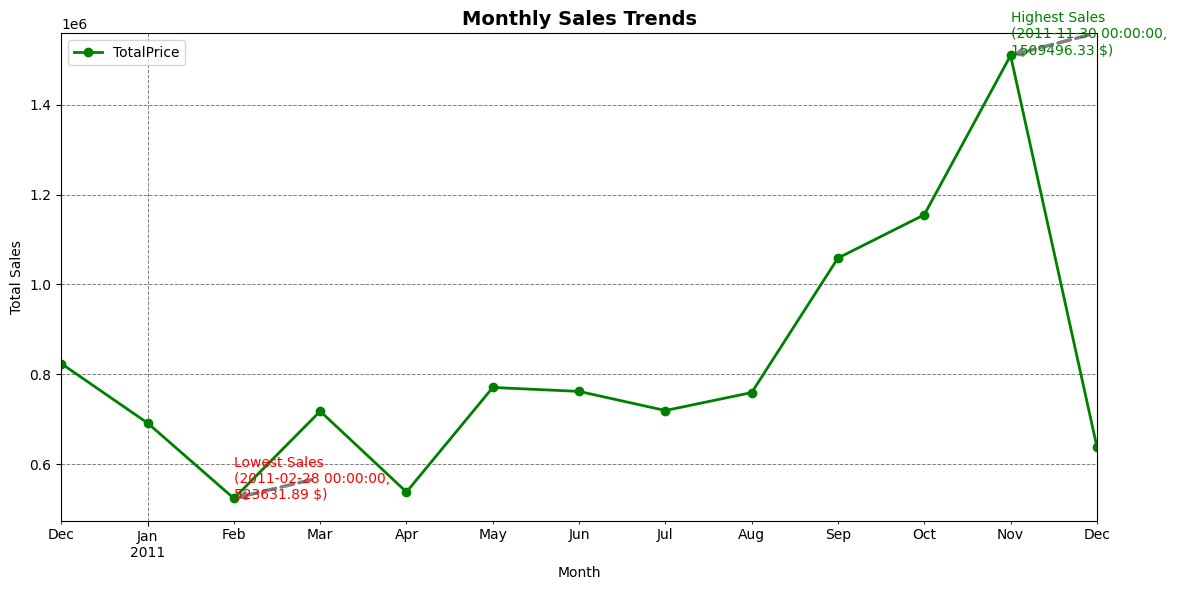

In [ ]:
# Plot monthly sales trends using a line plot
# Create a line chart
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', linestyle='-', color='green', linewidth=2)

# Set labels and
plt.title("Monthly Sales Trends", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.annotate(f'Highest Sales\n({highest_sales_month}, \n{highest_sales} $)',
                 xy=(monthly_sales.idxmax(), highest_sales),
                 xytext=(monthly_sales.idxmax(), highest_sales + 2000),
                 arrowprops=dict(arrowstyle= '->', color='gray', lw=2.5, ls='--'),
                 color='green'
                 )
plt.annotate(f'Lowest Sales\n({lowest_sales_month}, \n{lowest_sales} $)',
                 xy=(monthly_sales.idxmin(), lowest_sales),
                 xytext=(monthly_sales.idxmin(), lowest_sales - 2000),
                 arrowprops=dict(arrowstyle= '->', color='gray', lw=2.5, ls='--'),
                 color='red'
                )

# Customize grid and legend
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.legend(loc='upper left', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Task 4: RFM Analysis (Customer Segmentation)

## Description:
- Segment customers based on recency, frequency, and monetary value.
- Visualize customer distribution in segments.

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
recency = df.groupby("CustomerID")["InvoiceDate"].max()
recency = (df["InvoiceDate"].max() - recency).dt.days
frequency = df.groupby("CustomerID")["InvoiceNo"].size()
monetary = df.groupby("CustomerID")["TotalPrice"].sum()

print(f'Recency is : \n{recency}\n')
print(f'Frequency is : \n{frequency}\n')
print(f'Monetary is : \n{monetary}\n')

Recency is : 
CustomerID
-1.0          0
 12346.0    325
 12347.0      1
 12348.0     74
 12349.0     18
           ... 
 18280.0    277
 18281.0    180
 18282.0      7
 18283.0      3
 18287.0     42
Name: InvoiceDate, Length: 4340, dtype: int64

Frequency is : 
CustomerID
-1.0        133359
 12346.0         1
 12347.0       182
 12348.0        31
 12349.0        73
             ...  
 18280.0        10
 18281.0         7
 18282.0        12
 18283.0       756
 18287.0        70
Name: InvoiceNo, Length: 4340, dtype: int64

Monetary is : 
CustomerID
-1.0        1755276.64
 12346.0      77183.60
 12347.0       4310.00
 12348.0       1797.24
 12349.0       1757.55
               ...    
 18280.0        180.60
 18281.0         80.82
 18282.0        178.05
 18283.0       2094.88
 18287.0       1837.28
Name: TotalPrice, Length: 4340, dtype: float64



In [ ]:
rfm = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})
rfm['Recency_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm['Recency_Score'].astype(int) + rfm['Frequency_Score'].astype(int) + rfm['Monetary_Score'].astype(int)

In [ ]:
def segment_customer(rfm_score):
    if rfm_score >= 9:
        return 'High'
    elif 5 <= rfm_score < 9:
        return 'Medium'
    else:
        return 'Low'

In [ ]:
rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)
print(rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Segment']])
rfm['Segment']

            Recency  Frequency    Monetary  RFM_Score Segment
CustomerID                                                   
-1.0              0     133359  1755276.64         12    High
 12346.0        325          1    77183.60          6  Medium
 12347.0          1        182     4310.00         12    High
 12348.0         74         31     1797.24          8  Medium
 12349.0         18         73     1757.55         10    High
...             ...        ...         ...        ...     ...
 18280.0        277         10      180.60          3     Low
 18281.0        180          7       80.82          3     Low
 18282.0          7         12      178.05          6  Medium
 18283.0          3        756     2094.88         12    High
 18287.0         42         70     1837.28         10    High

[4340 rows x 5 columns]


,Segment
CustomerID,
-1.0,High
12346.0,Medium
12347.0,High
12348.0,Medium
12349.0,High
...,...
18280.0,Low
18281.0,Low
18282.0,Medium


In [ ]:
rfm.head(10)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
CustomerID,,,,,,,,
-1.0,0,133359,1755276.64,4,4,4,12,High
12346.0,325,1,77183.60,1,1,4,6,Medium
12347.0,1,182,4310.00,4,4,4,12,High
12348.0,74,31,1797.24,2,2,4,8,Medium
12349.0,18,73,1757.55,3,3,4,10,High
12350.0,309,17,334.40,1,1,2,4,Low
12352.0,35,85,2506.04,3,3,4,10,High
12353.0,203,4,89.00,1,1,1,3,Low
12354.0,231,58,1079.40,1,3,3,7,Medium


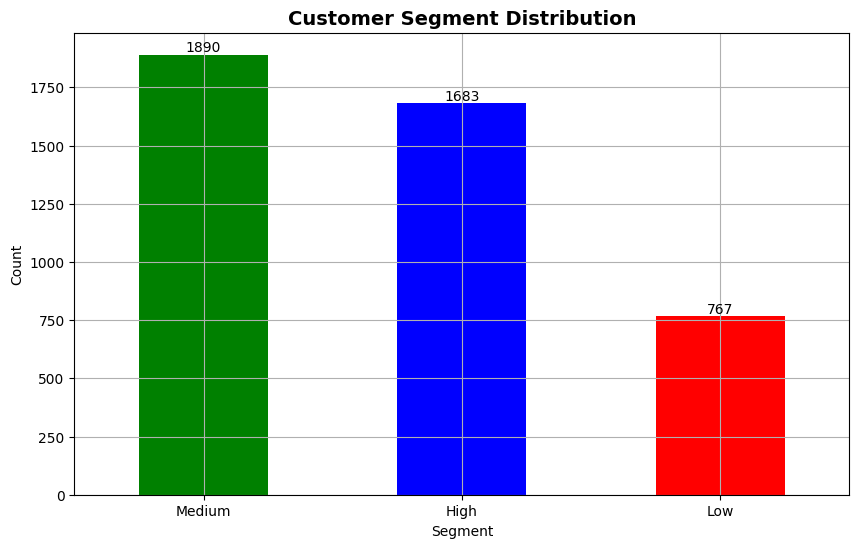

In [ ]:
#Visualize customer distribution in segments

segment_color = ['green', 'blue', 'red']
segment_distribution = rfm['Segment'].value_counts()

plt.figure(figsize=(10, 6))
n = segment_distribution.plot(kind='bar', rot=0, grid=True, color = segment_color)
n.bar_label(n.containers[0], fontsize=10);
plt.title('Customer Segment Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

# Task 5: Product Category Analysis

## Description:
- Analyze sales and revenue by product category
- and visualize the top categories by revenue.



In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Extract product category from Description
df['Category'] = df['Description'].str.split().str[-2:].str.join(' ')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,WHITE HEART.


In [ ]:
# Calculate sales and revenue by category
category_sales = df.groupby('Category')['Quantity'].sum()
print(f'Sum of Quantity is : \n{category_sales}')

print("\n" + "*" * 20 + "\n")

category_revenue = df.groupby('Category')['TotalPrice'].sum()
print(f'Sales By Revenue is : \n{category_revenue}')

Sum of Quantity is : 
Category
& CROSSES         2859
& LADDERS         1792
& LEAF              10
& NEST              51
& PENS              68
                  ... 
test                23
this section        30
tick ret          1300
website fixed      110
wrongly marked      48
Name: Quantity, Length: 2454, dtype: int64

********************

Sales By Revenue is : 
Category
& CROSSES         6436.61
& LADDERS         7062.70
& LEAF              25.13
& NEST              36.21
& PENS              57.80
                   ...   
test                 0.00
this section         0.00
tick ret             0.00
website fixed        0.00
wrongly marked       0.00
Name: TotalPrice, Length: 2454, dtype: float64


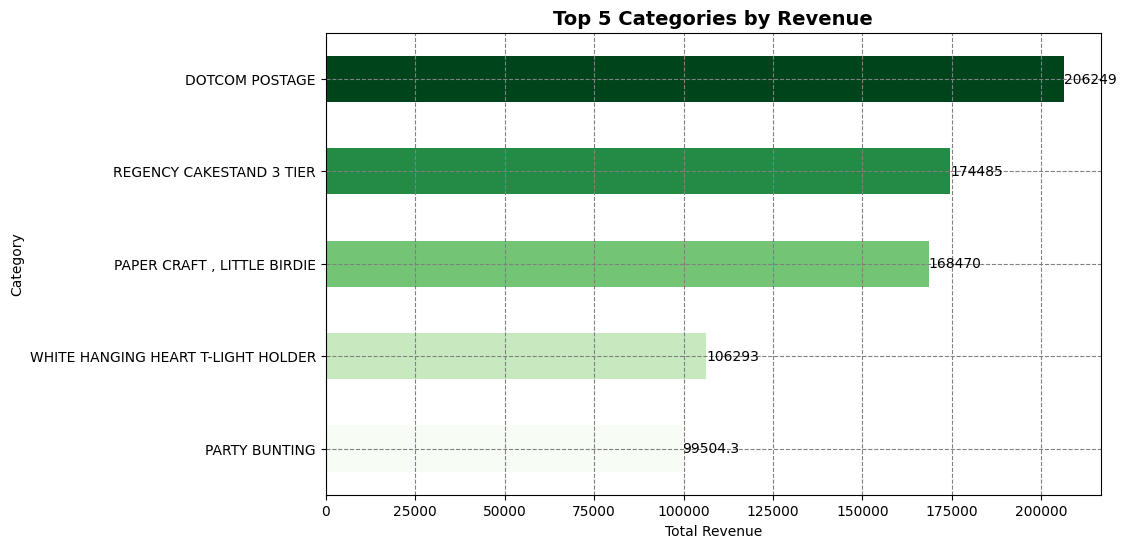

In [ ]:
# Create a bar plot of the top 5 categories by revenue
top5_categories_by_revenue = df.groupby('Description')['TotalPrice'].sum().nlargest(5)
cmap_top5_categories_by_revenue = cm.get_cmap('Greens', len(top5_categories_by_revenue))
top5_categories_by_revenue_colors = [cmap_top5_categories_by_revenue(i) for i in range(len(top5_categories_by_revenue))]

plt.figure(figsize=(10, 6))
ax = top5_categories_by_revenue.sort_values().plot(kind='barh', color= top5_categories_by_revenue_colors)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Top 5 Categories by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.grid(color='gray', linestyle='--')
plt.show()

# Task 6: Geographical Analysis

## Description:
- Analyze sales distribution by country and
- identify top revenue-generating countries.

In [ ]:
# Calculate total revenue by country
total_revenue_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False) # .nlargest(10)
print(f'Total Revenue By Country is : {total_revenue_country}')

Total Revenue By Country is : Country
United Kingdom          9025222.084
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15691.800
Cyprus                    13590.380
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
Canada                    

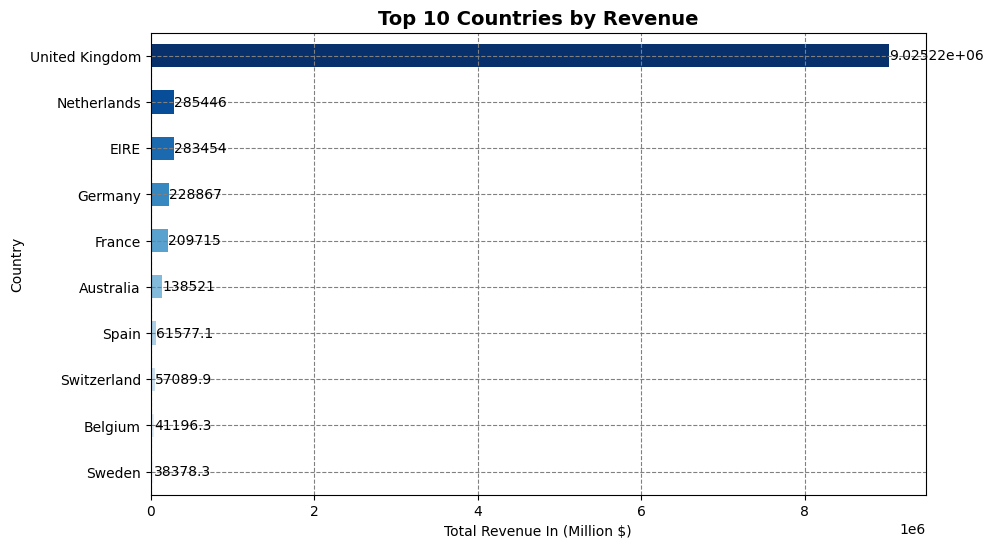

<Figure size 640x480 with 0 Axes>

In [ ]:
# Top 10 countries by revenue
plt.figure(figsize=(10, 6))

total_revenue_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
top_10_countries = total_revenue_country.nlargest(10)
cmap_top10_countries_colors = cm.get_cmap('Blues', len(top_10_countries))
colors_countries = [cmap_top10_countries_colors(i) for i in range(len(top_10_countries))]
m = top_10_countries.sort_values().plot(kind='barh', rot=0, color= colors_countries)
m.bar_label(m.containers[0], fontsize=10)

plt.title('Top 10 Countries by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Total Revenue In (Million $)')
plt.ylabel('Country')
plt.grid(color='gray', linestyle='--')
plt.show()

plt.tight_layout()
plt.show()

# Prepare data for the choropleth map
country_revenue = total_revenue_country.reset_index()
country_revenue.columns = ['Country', 'TotalRevenue']

# 2. Filled Map (Choropleth Map)
fig = px.choropleth(
    country_revenue,
    locations="Country",
    locationmode="country names",  # Match country names
    color="TotalRevenue",  # Color intensity based on revenue
    hover_name="Country",  # Hover text
    color_continuous_scale="Greens",
    title="Revenue by Country (Choropleth Map)",
)

# Update layout for better visualization
fig.update_layout(
    title_x=0.5,  # Center the title
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="equirectangular",
    ),
)

fig.show()

In [ ]:
# Calculate the percentage of sales from the top 3 countries
top_3_countries = total_revenue_country.nlargest(3)
total_sales = total_revenue_country.sum()
percentage_sales = (top_3_countries / total_sales) * 100
print(f'Percentage of Sales From Top 3 Countries is : {round(percentage_sales, 2)}')

Percentage of Sales From Top 3 Countries is : Country
United Kingdom    84.61
Netherlands        2.68
EIRE               2.66
Name: TotalPrice, dtype: float64


# Task 7: Customer Behavior Analysis

## Description:  
- Analyze customer behavior based on order quantity, sales, and purchasing patterns.

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,WHITE HEART.


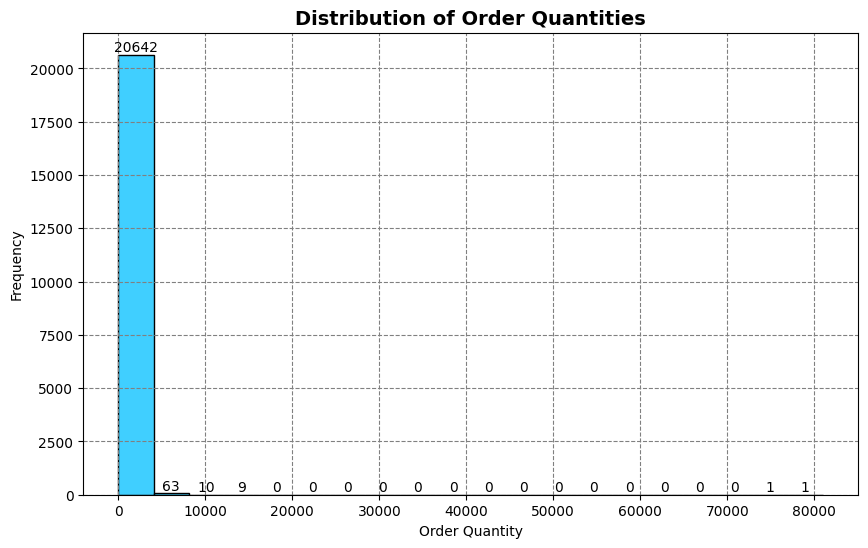

In [ ]:
# Plot the distribution of order quantities
order_quantity_data = df.groupby("InvoiceNo")["Quantity"].sum()

plt.figure(figsize=(10, 6))
az = sns.histplot(order_quantity_data, bins=20, kde=False, color='deepskyblue')  #Take Sample: df['Quantity'][:500]
az.bar_label(az.containers[0], fontsize=10);
plt.title('Distribution of Order Quantities', fontsize=14, fontweight='bold')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.grid(color='gray', linestyle='--')
plt.show()

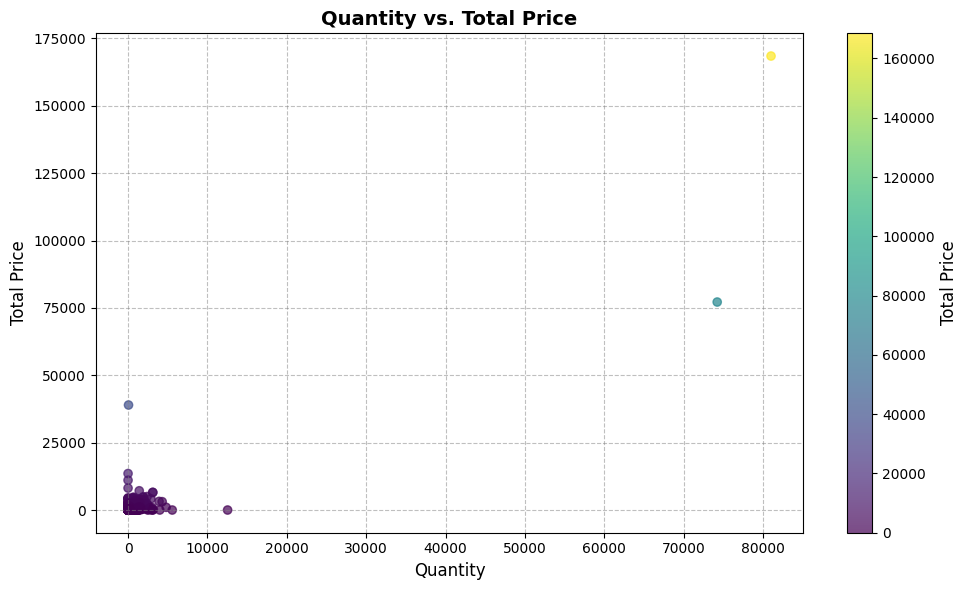

In [ ]:
# Normalize the color range based on the 'TotalPrice' column
norm_scatter_plot = mcolors.Normalize(vmin=df['TotalPrice'].min(), vmax=df['TotalPrice'].max())
cmap_scatter_plot = plt.cm.viridis  # Choose a colormap, e.g., 'viridis', 'plasma', etc.

# Create the scatter plot with a color gradient
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    df['Quantity'],
    df['TotalPrice'],
    c=df['TotalPrice'],
    cmap=cmap_scatter_plot,
    norm=norm_scatter_plot,
    alpha=0.7
)

# Add a colorbar to indicate the scale
cbar = plt.colorbar(sc)
cbar.set_label('Total Price', fontsize=12)

# Set plot labels and title
plt.title('Quantity vs. Total Price', fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.grid(color='gray', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


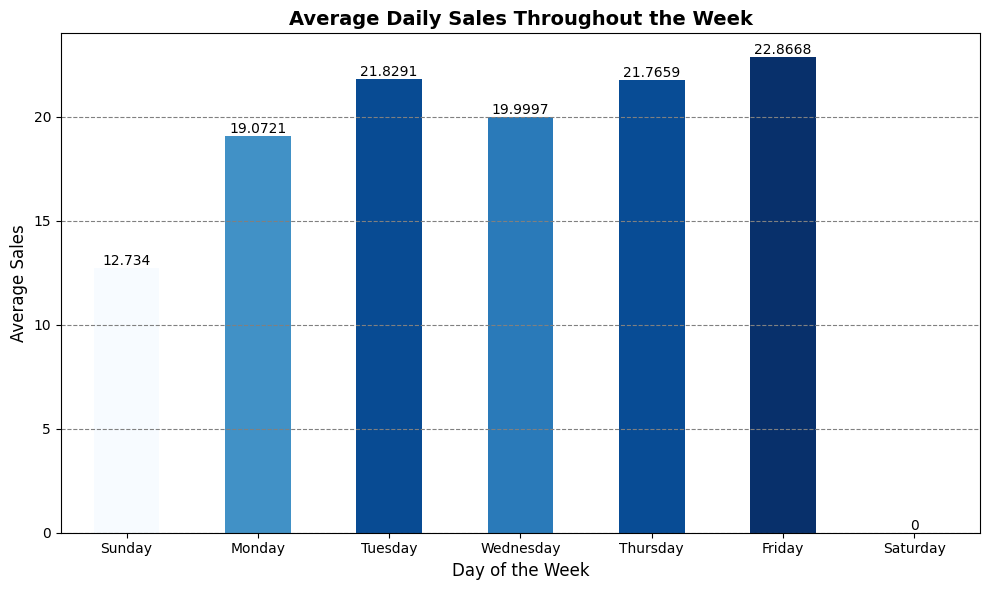

In [ ]:
# Calculate and plot average daily sales throughout the week
df['DayofWeek'] = df['InvoiceDate'].dt.day_name()

# Convert calendar.day_name to a list and use it for sorting
day_names = list(calendar.day_name)
df['DayofWeek'] = pd.Categorical(df['DayofWeek'], categories=day_names, ordered=True)
avg_daily_sales = df.groupby('DayofWeek')['TotalPrice'].mean().reindex(
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Normalize values for coloring
norm = plt.Normalize(vmin=avg_daily_sales.min(), vmax=avg_daily_sales.max())
cmap_avg_daily_sales = cm.get_cmap('Blues')

colors = [cmap_avg_daily_sales(norm(value)) for value in avg_daily_sales]

plt.figure(figsize=(10, 6))
aq = avg_daily_sales.plot(kind='bar', color=colors)  # Apply gradient colors
aq.bar_label(aq.containers[0], fontsize=10)
plt.title('Average Daily Sales Throughout the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=0)
plt.grid(color='gray', linestyle='--', axis='y')
plt.tight_layout()
plt.show()

# Task 8: Moving Average Forecast

## Description:
- Implement a basic moving average forecast for sales based on past data

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Category,DayofWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,T-LIGHT HOLDER,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,METAL LANTERN,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,COAT HANGER,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,WATER BOTTLE,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,WHITE HEART.,Wednesday


In [ ]:
# Prepare daily sales data
daily_sales = df.set_index('InvoiceDate').resample('D')['TotalPrice'].sum().reset_index()
daily_sales.head()

,InvoiceDate,TotalPrice
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-04,0.00
4,2010-12-05,31774.95


In [ ]:
# Calculate a 7-day moving average
daily_sales['7-Day MA'] = daily_sales['TotalPrice'].rolling(window=7).mean()
daily_sales.head(10)

,InvoiceDate,TotalPrice,7-Day MA
0,2010-12-01,58960.79,NaN
1,2010-12-02,47748.38,NaN
2,2010-12-03,46943.71,NaN
3,2010-12-04,0.00,NaN
4,2010-12-05,31774.95,NaN
5,2010-12-06,54830.46,NaN
6,2010-12-07,99618.20,48553.784286
7,2010-12-08,45389.98,46615.097143
8,2010-12-09,53586.18,47449.068571
9,2010-12-10,59182.92,49197.527143


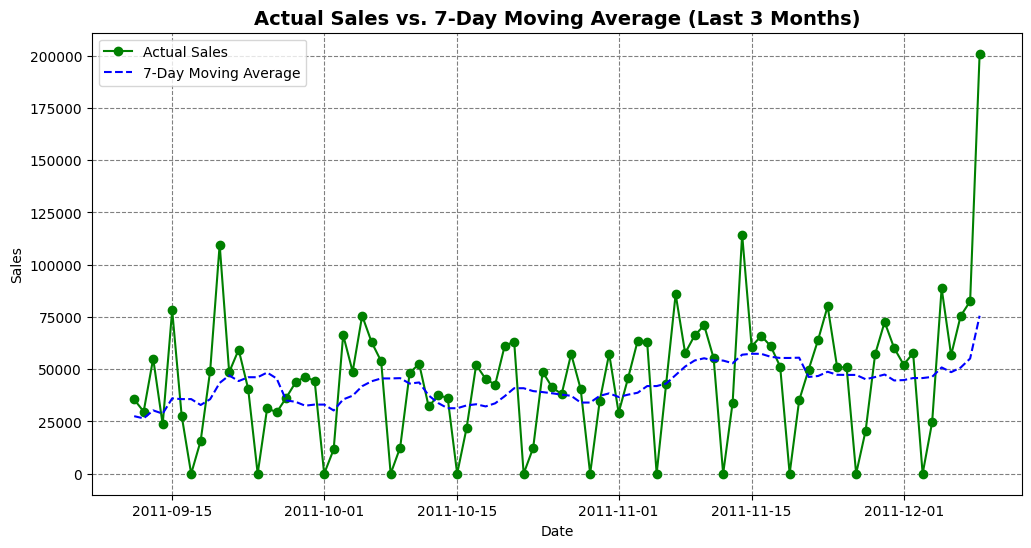

In [ ]:
# Plot actual sales vs. moving average for the last 3 months
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['InvoiceDate'][-90:], daily_sales['TotalPrice'][-90:], label='Actual Sales', color='green', marker='o')
plt.plot(daily_sales['InvoiceDate'][-90:], daily_sales['7-Day MA'][-90:], label='7-Day Moving Average', color='blue', linestyle='--')
plt.title('Actual Sales vs. 7-Day Moving Average (Last 3 Months)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(color='gray', linestyle='--')
plt.show()

# Task 9: Summary Dashboard Creation

## Description:
- Create a dashboard that summarizes key insights through visualizations.

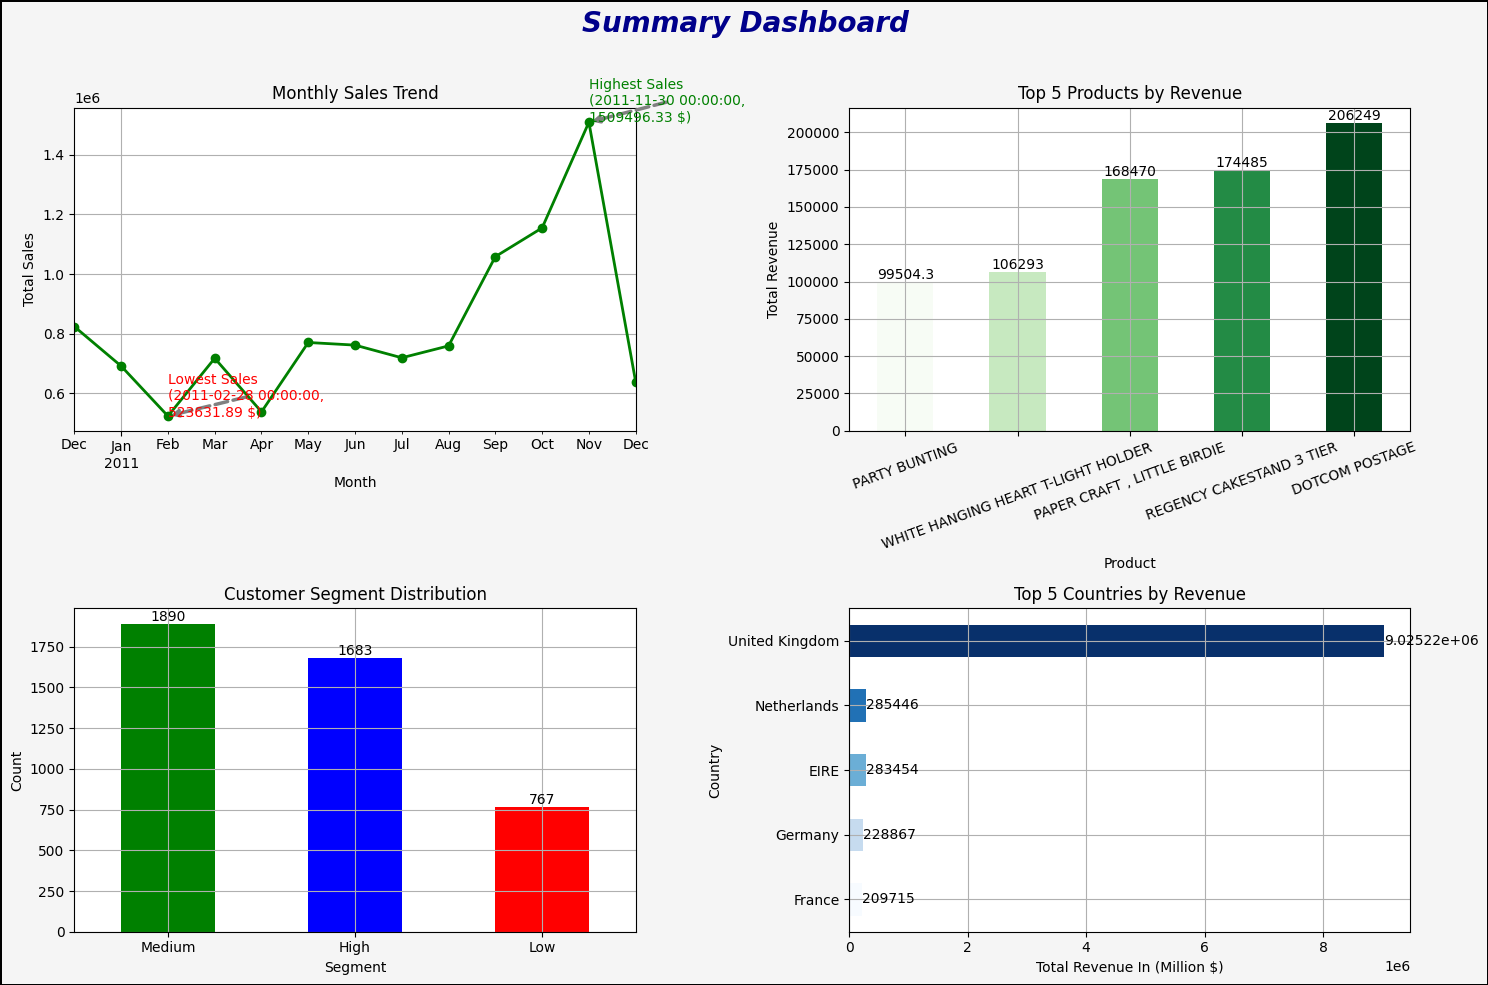

In [ ]:
# Prepare data for mapping
country_revenue = df.groupby('Country')['TotalPrice'].sum().reset_index()
country_revenue.columns = ['Country', 'TotalRevenue']

# Create a 2x2 subplot with:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

##############################################################################################################################################

# Set the title for the entire dashboard with added styles
fig.suptitle('Summary Dashboard\n', fontsize=20, fontweight='bold', ha='center', va='top', color='darkblue', style='italic')#, shadow=True)

# Manually adjust the title's position for padding
fig.subplots_adjust(top=0.93)  # Move the title down by adjusting the top padding

# Set a border around the figure
fig.patch.set_edgecolor('black')  # Border color for the figure
fig.patch.set_linewidth(2)  # Border thickness

# Add a light background color to the entire figure
fig.patch.set_facecolor('#f5f5f5')  # Light grey background color

##############################################################################################################################################
# 1. Monthly sales trend
monthly_sales.plot(kind='line', title='Monthly Sales Trend', marker='o', linestyle='-', color='green', linewidth=2, ax=axes[0, 0])
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].grid(True)

# Add annotations to the plot
axes[0, 0].annotate(
    f'Highest Sales\n({highest_sales_month}, \n{highest_sales} $)',
    xy=(highest_sales_month, highest_sales),
    xytext=(highest_sales_month, highest_sales + 2000),
    arrowprops=dict(arrowstyle='->', color='gray', lw=2.5, ls='--'),
    color='green'
)

axes[0, 0].annotate(
    f'Lowest Sales\n({lowest_sales_month}, \n{lowest_sales} $)',
    xy=(lowest_sales_month, lowest_sales),
    xytext=(lowest_sales_month, lowest_sales - 2000),
    arrowprops=dict(arrowstyle='->', color='gray', lw=2.5, ls='--'),
    color='red'
)

##############################################################################################################################################
# 2. Top 5 products by revenue

a1 = top5_categories_by_revenue.sort_values().plot(kind='bar', ax=axes[0, 1], title='Top 5 Products by Revenue', rot=20, color= top5_categories_by_revenue_colors)
a1.bar_label(a1.containers[0], fontsize=10)
axes[0, 1].set_xlabel('Product')
axes[0, 1].set_ylabel('Total Revenue')
axes[0, 1].grid(True)


##############################################################################################################################################
# 3. Customer segment distribution
a2 = segment_distribution.plot(kind='bar', ax=axes[1, 0], title='Customer Segment Distribution', rot=0, grid=True, color = segment_color)
a2.bar_label(a2.containers[0], fontsize=10);
axes[1, 0].set_xlabel('Segment')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(True)


##########################################################################################################
# 4. Top 5 countries by revenue
total_revenue_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
top_5_countries = total_revenue_country.nlargest(5)
cmap_top5_countries_colors = cm.get_cmap('Blues', len(top_5_countries))
top5_countries_colors = [cmap_top5_countries_colors(i) for i in range(len(top_5_countries))]

a3 = top_5_countries.sort_values().plot(
    kind='barh',
    ax=axes[1, 1],
    title='Top 5 Countries by Revenue',
    rot=0,
    color=top5_countries_colors
)
a3.bar_label(a3.containers[0], fontsize=10)

axes[1, 1].set_xlabel('Total Revenue In (Million $)')
axes[1, 1].set_ylabel('Country')
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the matplotlib figures first
plt.show()

##########################################################################################################
# 5. Create and display the Choropleth map
fig = px.choropleth(
    country_revenue,
    locations='Country',
    locationmode='country names',  # Match country names
    color='TotalRevenue',
    color_continuous_scale='Viridis',
    title='Revenue by Country (Choropleth Map)',
    labels={'TotalRevenue': 'Total Revenue'},
)

# Update layout for better visualization
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    title_x=0.5  # Center the title
)

# Show the interactive Choropleth map
fig.show()

# Task 10: Optimize Data Processing

# Description:
- Optimize a computationally intensive task using vectorized operations.

In [ ]:
#  Implement a task using loops
def loop_based_sum(data):
    result = []
    for val in data['Quantity'] * data['UnitPrice']:
        result.append(val)
    return sum(result)

In [ ]:
# Implement the same task using vectorized operations
def vectorized_sum(data):
    return (data['Quantity'] * data['UnitPrice']).sum()

In [ ]:
# Compare and report performance differences
loop_time = %timeit -o loop_based_sum(df)
vectorized_time = %timeit -o vectorized_sum(df)

92 ms ± 5.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.53 ms ± 422 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
print(f'Loop Based Sum Time is : {loop_time.average}')
print(f'Vectorized Sum Time is : {vectorized_time.average}')

Loop Based Sum Time is : 0.09203887039997685
Vectorized Sum Time is : 0.0025313917728583745


In [ ]:
print(f"Loop-based sum: {loop_based_sum(df)}")
print(f"Vectorized sum: {vectorized_sum(df)}")

Loop-based sum: 10666684.544004016
Vectorized sum: 10666684.543999996


# Task 11: Report Generation

# Description:
- Generate a summary report with key insights and recommendations.

In [ ]:
# Summarize overall revenue, top-selling products, best customer segments, and countries.
print("Summary Report:")
print(f"Total Revenue: {product_analysis.total_revenue} \n")
print(f"Top Selling Products: {category_revenue.nlargest(5)} \n")
print(f"Best Customer Segment: {rfm['Segment'].value_counts().idxmax()} \n")
print(f"Top Countries by Revenue: {total_revenue_country.index.tolist()[:3]}")

Summary Report:
Total Revenue: 0        290.80
1       2343.63
2       2891.25
3       1628.17
4          4.15
         ...   
4072       0.00
4073       0.00
4074       0.00
4075       0.00
4076       0.00
Name: total_revenue, Length: 4077, dtype: float64 

Top Selling Products: Category
T-LIGHT HOLDER    251340.10
DOTCOM POSTAGE    206248.77
METAL SIGN        198111.84
3 TIER            188181.56
RED RETROSPOT     187192.23
Name: TotalPrice, dtype: float64 

Best Customer Segment: Medium 

Top Countries by Revenue: ['United Kingdom', 'Netherlands', 'EIRE']


In [ ]:
# Provide insights from time series analysis and recommendations
print(f"Highest Sales Month: {highest_sales_month.month} \n")
print(f"Lowest Sales Month: {lowest_sales_month.month} \n")

Highest Sales Month: 11 

Lowest Sales Month: 2 

